# Pergunta escolhida

Países com IDH elevado tendem a ter menos mortes por HIV? O acesso ao saneamento básico influencia?

# Tabelas das variáveis escolhidas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

hdi = pd.read_excel('hdi_human_development_index.xlsx')
hdi_2011 = hdi.loc[:,['geo',2011]]


In [3]:
hiv = pd.read_excel('annual_hiv_deaths_number_all_ages.xlsx')
hiv_2011= hiv.loc[:,['geo',2011]]


In [4]:
sani=pd.read_excel('at_least_basic_sanitation_overall_access_percent.xlsx')
sani_2011 = sani.loc[:,['geo',2011]]


# Atualizando índices e juntando as tabelas

In [5]:
hdi_idx = hdi_2011.set_index('geo')
sani_idx = sani_2011.set_index('geo')
hiv_idx = hiv_2011.set_index('geo')
hiv_idx.rename(index = str, columns = lambda column : str(column) + '_hiv')
hiv_2011_nonnul=hiv_idx[~hiv_idx[2011].isnull()]


In [6]:
dados = hdi_idx.join(sani_idx, how = 'inner',lsuffix ='_hdi', rsuffix = '_sanitation')
dados_2011 = dados.join(hiv_2011_nonnul, how = 'inner', lsuffix='_HIV')

dados_2011.to_csv('HDI_hiv.csv', index = True)
dados_2011.head()

,2011_hdi,2011_sanitation,2011
geo,,,
Afghanistan,0.463,34.7,350.0
Armenia,0.732,91.3,350.0
Australia,0.930,100.0,150.0
Austria,0.884,100.0,60.0
Azerbaijan,0.742,83.2,350.0


**Análise dos gráficos**

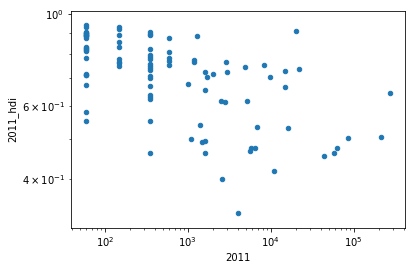

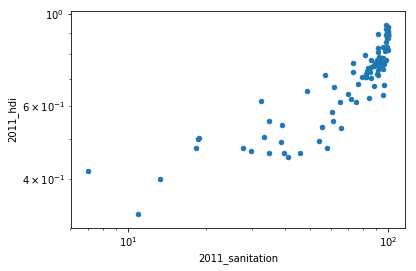

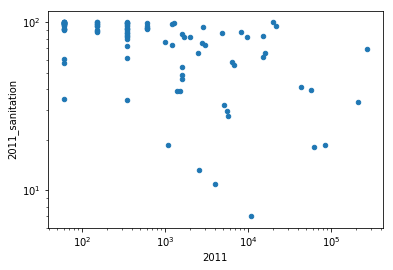

In [13]:
dados_2011.plot.scatter(x=2011, y='2011_hdi', loglog=True)
dados_2011.plot.scatter(x='2011_sanitation', y='2011_hdi',loglog=True)
dados_2011.plot.scatter(x=2011, y= '2011_sanitation', loglog=True)

Ajuste linear entre X3 e X4:
Coeficiente linear: 78.82916272779146
Coeficiente angular: -0.00019701130544448744


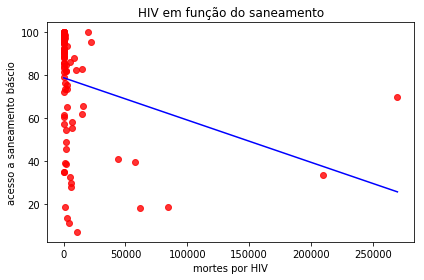

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.3140563437558814
Coeficiente angular: 0.005195953267767881


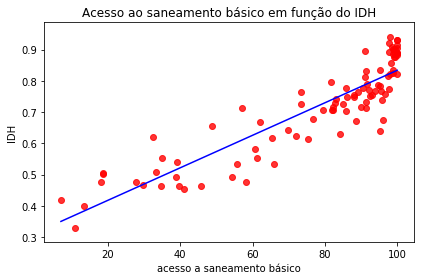

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.7238036941358764
Coeficiente angular: -1.0394871677092744e-06


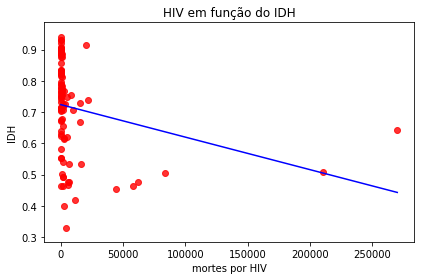

In [12]:
def reta(dados_x, dados_y,arg,arg2,arg3):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    #fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(arg)
    plt.xlabel(arg2)
    plt.ylabel(arg3)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    
reta(dados_2011[2011],dados_2011['2011_sanitation'],'HIV em função do saneamento','mortes por HIV','acesso a saneamento báscio')
reta(dados_2011['2011_sanitation'], dados_2011['2011_hdi'],'Acesso ao saneamento básico em função do IDH','acesso a saneamento básico','IDH')
reta(dados_2011[2011],dados_2011['2011_hdi'],'HIV em função do IDH','mortes por HIV','IDH')
#Função retirada de: https://pastebin.com/0KcDyqKq


In [9]:
dados_2011["2011_sanitation_log"] = np.log(dados_2011["2011_sanitation"])
dados_2011["2011_log"] = np.log(dados_2011[2011])
dados_2011['2011_HDI_log']= np.log(dados_2011['2011_hdi'])
dados_2011.corr()

,2011_hdi,2011_sanitation,2011,2011_sanitation_log,2011_log,2011_HDI_log
2011_hdi,1.000000,0.901033,-0.251403,0.825575,-0.591302,0.992409
2011_sanitation,0.901033,1.000000,-0.274768,0.957691,-0.575120,0.917496
2011,-0.251403,-0.274768,1.000000,-0.231108,0.592359,-0.243103
2011_sanitation_log,0.825575,0.957691,-0.231108,1.000000,-0.516215,0.862950
2011_log,-0.591302,-0.575120,0.592359,-0.516215,1.000000,-0.581187
2011_HDI_log,0.992409,0.917496,-0.243103,0.862950,-0.581187,1.000000


In [10]:
dados_2011.sort_values(by=2011).tail()

,2011_hdi,2011_sanitation,2011,2011_sanitation_log,2011_log,2011_HDI_log
geo,,,,,,
Zimbabwe,0.464,39.6,58000.0,3.678829,10.968198,-0.767871
Uganda,0.477,18.2,62000.0,2.901422,11.034890,-0.740239
Tanzania,0.504,18.7,84000.0,2.928524,11.338572,-0.685179
Nigeria,0.507,33.4,210000.0,3.508556,12.254863,-0.679244
South Africa,0.644,69.8,270000.0,4.245634,12.506177,-0.440057


# Análise dos dados

        Com base nos ferramentais utilizados, podemos responder à questão proposta. Para começar, podemos analisar as curva de correlação feita. No gráfico que mostra a correlação entre mortes por HIV (2011) e IDH, vemos claramente que não há correlação. Porém, isso se dá ao fato de que há valores muito isolados que fazem com que o gráfico não mostre o que realmente acontece. Se olharmos para o gráfico dispersado em que ambos os eixos estão em escala logarítmica, nota-se que há uma certa tendencia entre IDH e HIV. Vemos que quanto maior o IDH, as mortes por HIV tendem a ser menores. Para reforçar, podemos olhar a tabela de correlação. Se compararmos a correlação entre IDH e mortes por HIV (2011), há apenas -0.25 de correlação, podendo interpretar então que um não depende do outro. Mas, após colocarmos ambos em escala logarítmica, vemos que há uma correlação mais forte, de -0.58. Com isso, podemos dizer que, por haver uma correlação abaixo de -0.5 há uma certa relação entre IDH e mortes por HIV mas que um não influencia totalmente o outro.
       Observando a relação entre acesso a saneamento básico e IDH, observa-se que claramente ambos estão relacionados e que saneamento básico depende bastante do IDH do pais. Isso se verifica olhando para a tabela de correlação. Há uma correlação de 0.9 entre elas, mostrando que saneamento básico está fortemente ligado ao IDH. Tentando então relacionar acesso a saneamento básico com morte por HIV em relação ao gráfico de correlação, verificamos que acontece o mesmo que no gráfico de HIV por IDH. Por ter pontos muito isolados, não podemos ver com clareza o que acontece com o resto dos pontos. Observando o gráfico de dispersão em escala logarítmica, vemos que não há uma certa tendência.Por mais que a tabela de correlação aponte -0.51, isso se dá ao fato de que há pontos extremamente próximos e até mesmo no mesmo lugar fazendo com que dê essa correlação. Nos dois gráficos há um ponto isolado dos outros. Esse ponto representa a Africa do Sul. O que torna peculiar, pois 69% da população tem acesso à saneamento básico mas contou 270.000 mortes por HIV em 2011. Um número praticamente quatro vezes maior que a Uganda onde apenas 18,2% da população tem acesso ao saneamento básico. 
       Conclui-se que há uma relação entre HIV e IDH, mas que um não depende fortemente do outro. Pode-se dizer que o saneamento não influencia diretamente nas mortes por HIV, por mais que seja extremamente atrelado ao IDH.